### 获取数据

In [2]:
import pymysql.cursors
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 连接数据库
connect = pymysql.Connect(
    host='118.31.61.2',
    port=3306,
    user='sim509',
    passwd='sim509sim509',
    #db='wechat_ohc',
    charset='utf8'
)

In [698]:
cursor = connect.cursor()

In [243]:
sql = "show databases" 
   # 执行SQL语句
cursor.execute(sql)
   # 获取所有记录列表
results = cursor.fetchall()

In [244]:
results

(('information_schema',),
 ('all_wechat',),
 ('baidu_jingyan',),
 ('goods',),
 ('haodf',),
 ('mysql',),
 ('onmall',),
 ('onteach',),
 ('performance_schema',),
 ('sys',),
 ('wechat_analysis',),
 ('wechat_tag',))

In [717]:
#sql = "show tables from wechat_tag" 
# info ,wechat_tag.wechat_contact; content,wechat_tag.wechat_message_clean
sql = "show tables from wechat_tag" 
   # 执行SQL语句
cursor.execute(sql)
   # 获取所有记录列表
cursor.fetchall()

(('auth_group',),
 ('auth_group_permissions',),
 ('auth_permission',),
 ('auth_user',),
 ('auth_user_groups',),
 ('auth_user_user_permissions',),
 ('django_admin_log',),
 ('django_content_type',),
 ('django_migrations',),
 ('django_session',),
 ('first_user',),
 ('tag_history',),
 ('wechat_contact',),
 ('wechat_message_clean',))

In [725]:
# #sql = "desc wechat_tag.tag_history" 
# sql = "select *  from wechat_tag.wechat_message_clean limit 10" 
#    # 执行SQL语句
# cursor.execute(sql)
#    # 获取所有记录列表
# cursor.fetchall()

In [131]:
sql = "select wechat_id,nickname,at_names from wechat_tag.wechat_contact" 
   # 执行SQL语句
cursor.execute(sql)
   # 获取所有记录列表
df_info = cursor.fetchall()

In [134]:
#群名称与昵称对应编码和中文名
df_info = pd.DataFrame(list(df_info))
#df_info.to_csv('data//info.csv',encoding = 'utf-8-sig',index = None)

In [7]:
sql = "select chatroom,timestampdiff(DAY,min(createTime),max(createTime))  from all_wechat.wechat_message_clean  group by chatroom" 
   # 执行SQL语句
cursor.execute(sql)
   # 获取所有记录列表
cursor.fetchall()

(('10690173821@chatroom', 67),
 ('12061178839@chatroom', 61),
 ('12177174851@chatroom', 68),
 ('12288142451@chatroom', 112),
 ('2932669628@chatroom', 516),
 ('4378846627@chatroom', 75),
 ('5007452012@chatroom', 239),
 ('5064606722@chatroom', 165),
 ('5357135789@chatroom', 166),
 ('5383512475@chatroom', 359),
 ('5383597804@chatroom', 311),
 ('5556417190@chatroom', 406),
 ('5860808232@chatroom', 205),
 ('6342900410@chatroom', 484),
 ('6378298822@chatroom', 517),
 ('6506298440@chatroom', 518),
 ('6625489787@chatroom', 517),
 ('6983299053@chatroom', 516),
 ('7011298462@chatroom', 516),
 ('7415625039@chatroom', 516),
 ('8309357221@chatroom', 113),
 ('8619181835@chatroom', 55),
 ('9174142886@chatroom', 103))

In [435]:
sql = "select msgId,chatroom,mType,createTime,content,flow_tag,talker_id from  wechat_tag.wechat_message_clean" 
   # 执行SQL语句
cursor.execute(sql)
   # 获取所有记录列表
df = cursor.fetchall()

In [436]:
import pandas as pd
df = pd.DataFrame(list(df))
len(df)

122096

In [437]:
df.head()

,0,1,2,3,4,5,6
0,49760,5007452012@chatroom,1,2018-08-24 11:22:58,不能比价格,2,wxid_psmmfcuyrvie21
1,49761,5007452012@chatroom,1,2018-08-24 11:23:05,是,2,sujie9988
2,49762,5007452012@chatroom,1,2018-08-24 11:23:10,髓母多了一个脊髓放疗,2,wxid_psmmfcuyrvie21
3,49763,5007452012@chatroom,1,2018-08-24 11:23:12,可以去德国,2,wxid_nr9f78yoe69421
4,49764,5007452012@chatroom,1,2018-08-24 11:23:27,钱都交了，安心治疗吧，现在长庚医院也要求治疗前费用交齐了,2,limuhao001


In [726]:
#df1.drop([0],axis = 1,inplace = True)
connect.close()

In [441]:
df = df.rename(columns = {0:'msgId',1:'chatroom',2:'mType',3:'createTime',4:'content',5:'flow_tag',6:'talker_id'})

In [442]:
len(df[df.chatroom == '5007452012@chatroom']),len(df[df.chatroom == '5556417190@chatroom'])

(64807, 57289)

In [451]:
print(len(df[df.chatroom == '5007452012@chatroom'][df.mType == 1]))
print(len(df[df.chatroom == '5556417190@chatroom'][df.mType == 1]))

61989
53992


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [448]:
mType = df.groupby('mType').content.count()
#mType = pd.DataFrame(list(mType))

In [449]:
mType.to_csv('data//mType.csv',encoding = 'utf-8-sig')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [16]:
# df1.to_csv('data//all_wechat.csv',encoding = 'utf-8-sig',index = None)

In [39]:
#df2 = pd.read_csv('data//child3.txt',encoding = 'utf-8')

In [4]:
df = pd.read_csv('data//child2&3.csv',encoding = 'utf-8')

In [9]:
df.groupby('chatroom').msgId.count()

chatroom
5007452012@chatroom    64807
5556417190@chatroom    57289
Name: msgId, dtype: int64

In [16]:
type(df['createTime'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
from datetime import datetime
df['createTime']=df['createTime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

#### 发言时间分布

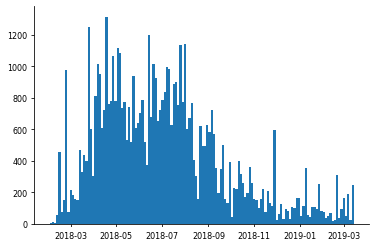

In [39]:
n, bins, patches = plt.hist(df[df.chatroom =='5556417190@chatroom'].createTime, 
                            bins=136, histtype='bar')

plt.rcParams["font.sans-serif"]=["SimHei"]
#plt.legend()
#plt.grid()
#plt.ylabel('发言量') # 横坐标轴的标题
#plt.xlabel('x')
ax=plt.gca() 
ax.spines["right"].set_color("none") #隐藏右边坐标轴的那条线
ax.spines["top"].set_color("none") #隐藏右边坐标轴的那条线
for label in ax.get_xticklabels()+ax.get_yticklabels(): #编辑设置坐标轴上的标注数值的格式
    label.set_fontsize(8) #设置标注数值数字大小尺
    label.set_color('black')
    label.set_bbox(dict(facecolor="white",edgecolor="none",alpha=1))  
plt.savefig("img//90_hist.png",dpi=300)
plt.show()
#print(df[df.chatroom =='5007452012@chatroom'].createTime.hist(bins = 120,normed=1,figsize = (10,6)))
#plt.savefig("filename.png",dpi=300)
#histtype : {'bar', 'barstacked', 'step',  'stepfilled'},log : bool, 

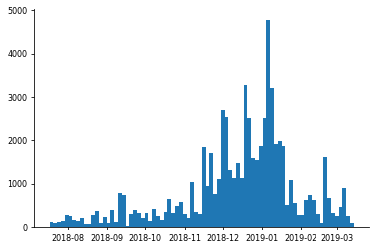

In [40]:
n, bins, patches = plt.hist(df[df.chatroom =='5007452012@chatroom'].createTime, 
                            bins=80, histtype='bar')

plt.rcParams["font.sans-serif"]=["SimHei"]
#plt.legend()
#plt.grid()
#plt.ylabel('发言量') # 横坐标轴的标题
#plt.xlabel('x')
ax=plt.gca() 
ax.spines["right"].set_color("none") #隐藏右边坐标轴的那条线
ax.spines["top"].set_color("none") #隐藏右边坐标轴的那条线
for label in ax.get_xticklabels()+ax.get_yticklabels(): #编辑设置坐标轴上的标注数值的格式
    label.set_fontsize(8) #设置标注数值数字大小尺
    label.set_color('black')
    label.set_bbox(dict(facecolor="white",edgecolor="none",alpha=1))  
plt.savefig("img//12_hist.png",dpi=300)
plt.show()
#print(df[df.chatroom =='5007452012@chatroom'].createTime.hist(bins = 120,normed=1,figsize = (10,6)))
#plt.savefig("filename.png",dpi=300)
#histtype : {'bar', 'barstacked', 'step',  'stepfilled'},log : bool, 

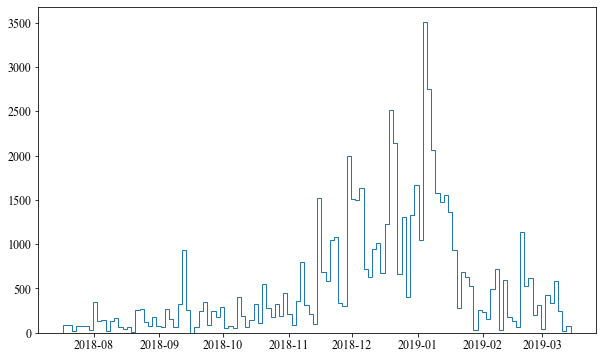

In [519]:
df[df.chatroom =='5007452012@chatroom'].createTime.hist(bins = 120,histtype='step',
                                                              grid = False,figsize = (10,6))

AxesSubplot(0.125,0.125;0.775x0.755)


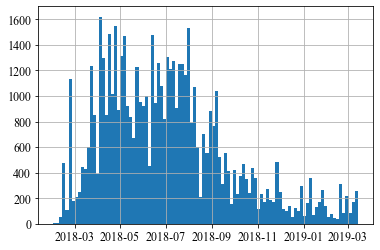

In [453]:
print(df[df.chatroom =='5556417190@chatroom'].createTime.hist(bins = 100))

In [459]:
df_date12 = df[df.chatroom =='5007452012@chatroom'].groupby('date').content.count()
df_date90 = df[df.chatroom =='5556417190@chatroom'].groupby('date').content.count()

In [461]:
df_date12 = pd.DataFrame(df_date12)
df_date90 = pd.DataFrame(df_date90)
df_date12['date'] = df_date12.index
df_date90['date'] = df_date90.index
df_date12= df_date12.reset_index(drop=True)
df_date90= df_date90.reset_index(drop=True)
df_date90.head()

,content,date
0,3,2018-01-31
1,6,2018-02-03
2,4,2018-02-06
3,3,2018-02-09
4,53,2018-02-11


In [476]:
#df_date90.to_csv('data//90_date.csv',encoding = 'utf-8-sig',index = None)

In [477]:
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import numpy as np
# % matplotlib inline
# import datetime#这个包很关键
# #设定开始和结束时间
# start=datetime.datetime(2018,1,31)
# stop=datetime.datetime(2019,3,14)
# delta=datetime.timedelta(1)#设定日期的间隔
# dates=mpl.dates.drange(start,stop,delta)# 返回浮点型的日期序列，这个是生成时间序列，同理如果是将序列转成日期呢？
# values=np.random.rand(len(dates))
# #存在两个问题，一个是坐标轴没有按照日期的形式去标注，另一个是刻度的数量和位置也不合适
# fig=plt.figure(figsize=(24,12))#调整画图空间的大小
# plt.plot(dates,values,linestyle='-',marker='*',c='r',alpha=0.5)#作图
# ax=plt.gca()
# date_format=mpl.dates.DateFormatter('%Y-%m-%d')#设定显示的格式形式
# ax.xaxis.set_major_formatter(date_format)#设定x轴主要格式
# ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(30))#设定坐标轴的显示的刻度间隔
# fig.autofmt_xdate()#防止x轴上的数据重叠，自动调整。


#### 发言频次统计，仅文本数据

In [252]:
df1= df1[df1.mType==1]
df1 = df1.reset_index(drop=True)
df_u90 = df1[df1.chatroom =='5556417190@chatroom'].groupby(['talker_id']).createTime.count()
df_u12 = df1[df1.chatroom =='5007452012@chatroom'].groupby(['talker_id']).createTime.count()
len(df_u90),len(df_u12)

(617, 514)

In [253]:
df_u90.head()

talker_id
A19920515001         77
Aria001               1
GUOJING965859953     26
H10151216             2
Joyce88272887       231
Name: createTime, dtype: int64

In [254]:
df_u90 = pd.DataFrame(df_u90)
df_u12 = pd.DataFrame(df_u12)

In [255]:
df_u90.index

Index(['A19920515001', 'Aria001', 'GUOJING965859953', 'H10151216',
       'Joyce88272887', 'Juan442756142', 'MCLZB84', 'PEluoluo', 'Q523qian',
       'WJ982059995',
       ...
       'xuejin334209', 'xxx521xiangxiang', 'yangzhangmin002', 'youwuhan',
       'yyy-xj', 'zhanglianlian0618', 'zhangyu032456', 'zhengjiman001',
       'zjkwuzhen', 'zxlgameboy'],
      dtype='object', name='talker_id', length=617)

In [256]:
df_u90['talker_id'] = df_u90.index
df_u12['talker_id'] = df_u12.index
df_u90= df_u90.reset_index(drop=True)
df_u12= df_u12.reset_index(drop=True)
df_u90.head()

,createTime,talker_id
0,77,A19920515001
1,1,Aria001
2,26,GUOJING965859953
3,2,H10151216
4,231,Joyce88272887


In [257]:
df_u90 = df_u90.rename(columns = {'createTime':'talk_cnt'})
df_u12 = df_u12.rename(columns = {'createTime':'talk_cnt'})

#### 发言时间差统计，添加min、max和max_min

In [455]:
from datetime import datetime, date
df['date']=df['createTime'].apply(lambda x:x.strftime("%Y-%m-%d"))

In [259]:
df1.loc[(df1['talker_id'] == 'A19920515001') & (df1['chatroom'] == '5556417190@chatroom'), 'date'].min()

'2018-04-13'

In [260]:
df1.loc[(df1['talker_id'] == 'A19920515001') & (df1['chatroom'] == '5556417190@chatroom'), 'date'].max()

'2018-05-10'

In [261]:
l1 = list()
l2 = list()
l3 = list()
for i in range(0,len(df_u90)):
    l1.append(df1.loc[(df1['talker_id'] == df_u90['talker_id'][i]) & (df1['chatroom'] == '5556417190@chatroom'),'date'].min())
for i in range(0,len(df_u90)):
    l2.append(df1.loc[(df1['talker_id'] == df_u90['talker_id'][i]) & (df1['chatroom'] == '5556417190@chatroom'),'date'].max())
df_u90['min_date']=pd.DataFrame(l1)
df_u90['max_date']=pd.DataFrame(l2)

for i in range(0,len(df_u90)):
    l3.append((datetime.strptime(df_u90['max_date'][i], "%Y-%m-%d")-datetime.strptime(df_u90['min_date'][i], "%Y-%m-%d")).days+1)
df_u90['max_min'] = pd.DataFrame(l3)
df_u90.head()

,talk_cnt,talker_id,min_date,max_date,max_min
0,77,A19920515001,2018-04-13,2018-05-10,28
1,1,Aria001,2019-03-12,2019-03-12,1
2,26,GUOJING965859953,2018-03-24,2018-09-23,184
3,2,H10151216,2018-07-07,2018-07-07,1
4,231,Joyce88272887,2018-05-13,2019-02-26,290


In [262]:
l1 = list()
for i in range(0,len(df_u12)):
    l1.append(df1.loc[(df1['talker_id'] == df_u12['talker_id'][i]) & (df1['chatroom'] == '5007452012@chatroom'), 'date'].min())
l2 = list()
for i in range(0,len(df_u12)):
    l2.append(df1.loc[(df1['talker_id'] == df_u12['talker_id'][i]) & (df1['chatroom'] == '5007452012@chatroom'), 'date'].max())
df_u12['min_date']=pd.DataFrame(l1)
df_u12['max_date']=pd.DataFrame(l2)
l3 = list()
for i in range(0,len(df_u12)):
    l3.append((datetime.strptime(df_u12['max_date'][i], "%Y-%m-%d")-datetime.strptime(df_u12['min_date'][i], "%Y-%m-%d")).days+1)
df_u12['max_min'] = pd.DataFrame(l3)
df_u12.head()

,talk_cnt,talker_id,min_date,max_date,max_min
0,241,BHY578343958,2018-08-10,2019-03-14,217
1,4,Fei675123358,2018-08-10,2018-08-10,1
2,53,Foolish-Bird,2018-10-07,2018-12-01,56
3,4,LM191179901,2018-11-19,2018-11-21,3
4,4,LRY20030813,2018-08-30,2019-02-04,159


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


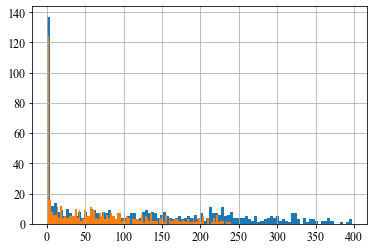

In [263]:
print(df_u90.max_min.hist(bins = 100))
print(df_u12.max_min.hist(bins = 100))

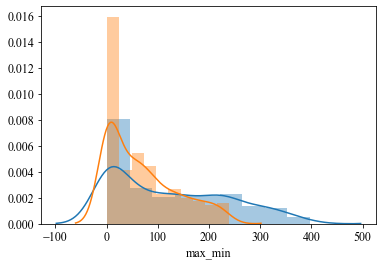

In [264]:
sns.distplot(df_u90.max_min)
sns.distplot(df_u12.max_min)

In [265]:
df_u90.min_date.max(),df_u90.min_date.min(),df_u12.min_date.max(),df_u12.min_date.min()

('2019-03-12', '2018-01-31', '2019-03-11', '2018-07-17')

In [266]:
df_u90.max_date.max(),df_u90.max_date.min(),df_u12.max_date.max(),df_u12.max_date.min()

('2019-03-14', '2018-02-23', '2019-03-14', '2018-07-17')

### observed标记，max_date与最后观察日期'2019-03-14'的差值超过60天，即churn（流失）

In [267]:
l2 = list()
for i in range(0,len(df_u90)):
    diff=0
    is_churn = 0
    diff = (datetime.strptime('2019-03-14', "%Y-%m-%d")-datetime.strptime(df_u90['max_date'][i], "%Y-%m-%d")).days
    if diff>=30:
        is_churn=1
    l2.append(is_churn)

In [268]:
l2[:10]

[1, 0, 1, 1, 0, 1, 1, 1, 0, 1]

In [269]:
df_u90['observed']=pd.DataFrame(l2)

In [270]:
l2 = list()
for i in range(0,len(df_u12)):
    diff=0
    is_churn = 0
    diff = (datetime.strptime('2019-03-14', "%Y-%m-%d")-datetime.strptime(df_u12['max_date'][i], "%Y-%m-%d")).days
    if diff>=60:
        is_churn=1
    l2.append(is_churn)
df_u12['observed']=pd.DataFrame(l2)

In [271]:
df_u90.max_min.describe()

count    617.000000
mean     124.215559
std      112.721329
min        1.000000
25%       10.000000
50%      105.000000
75%      217.000000
max      397.000000
Name: max_min, dtype: float64

In [272]:
df_u12.max_min.describe()

count    514.000000
mean      67.879377
std       67.402005
min        1.000000
25%        4.000000
50%       52.000000
75%      110.000000
max      240.000000
Name: max_min, dtype: float64

In [273]:
df_u12.head()

,talk_cnt,talker_id,min_date,max_date,max_min,observed
0,241,BHY578343958,2018-08-10,2019-03-14,217,0
1,4,Fei675123358,2018-08-10,2018-08-10,1,1
2,53,Foolish-Bird,2018-10-07,2018-12-01,56,1
3,4,LM191179901,2018-11-19,2018-11-21,3,1
4,4,LRY20030813,2018-08-30,2019-02-04,159,0


#### 合并at数据

In [274]:
df_at = pd.read_csv('data//at_result.csv',encoding = 'utf-8')

In [275]:
df_at.head()

,talker_id,nickname,at_cnt,group
0,wxid_psmmfcuyrvie21,我是你的大白丶,26,1
1,sujie9988,德国莱丽莎,1,1
2,wxid_nr9f78yoe69421,群,0,1
3,limuhao001,Mr李,13,1
4,wxid_pesj04yoden112,NaN,0,1


In [276]:
len(df_u90),len(df_u12),len(df_at[df_at.group== 1]),len(df_at[df_at.group == 2])

(617, 514, 523, 623)

In [277]:
# 添加活跃天数
l2 = list()
for i in range(0,len(df_u90)):
    lx=0
    lx = len(df1[df1['talker_id'] == df_u90['talker_id'][i]][df1['chatroom'] == '5556417190@chatroom'].date.unique())
    l2.append(lx)
df_u90['act_days']=pd.DataFrame(l2)
df_u90.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,talk_cnt,talker_id,min_date,max_date,max_min,observed,act_days
0,77,A19920515001,2018-04-13,2018-05-10,28,1,8
1,1,Aria001,2019-03-12,2019-03-12,1,0,1
2,26,GUOJING965859953,2018-03-24,2018-09-23,184,1,9
3,2,H10151216,2018-07-07,2018-07-07,1,1,1
4,231,Joyce88272887,2018-05-13,2019-02-26,290,0,41


In [278]:
l2 = list()
for i in range(0,len(df_u12)):
    lx=0
    lx = len(df1[df1['talker_id'] == df_u12['talker_id'][i]][df1['chatroom'] == '5007452012@chatroom'].date.unique())
    l2.append(lx)
df_u12['act_days']=pd.DataFrame(l2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [279]:
df_90 = pd.merge(df_u90,df_at[df_at.group == 2],on = "talker_id",how = "left")
df_12 = pd.merge(df_u12,df_at[df_at.group == 1],on = "talker_id",how = "left")

In [280]:
df_90.head()

,talk_cnt,talker_id,min_date,max_date,max_min,observed,act_days,nickname,at_cnt,group
0,77,A19920515001,2018-04-13,2018-05-10,28,1,8,NaN,0.0,2.0
1,1,Aria001,2019-03-12,2019-03-12,1,0,1,A?仰望??,1.0,2.0
2,26,GUOJING965859953,2018-03-24,2018-09-23,184,1,9,A开锁、换锁、修卷帘门15911556744,3.0,2.0
3,2,H10151216,2018-07-07,2018-07-07,1,1,1,时光静好2?1?,0.0,2.0
4,231,Joyce88272887,2018-05-13,2019-02-26,290,0,41,Joyce,10.0,2.0


In [281]:
#'5556417190@chatroom','5007452012@chatroom'
df_12.loc[:,'group'] = '12'
df_90.loc[:,'group'] = '90'

In [ ]:
# @别人数据
l = list()
for i in range(0,len(df1['content'])):
    if '@' in df1['content'][i]:
        tt=1
        l.append(tt)
    else:
        tt = 0
        l.append(tt)
df1['if_at']=pd.DataFrame(l)

In [292]:
l2 = list()
df2 = df1[df1.chatroom=='5007452012@chatroom']
for i in range(0,len(df_12)):
    l2.append(df2.loc[(df2['talker_id'] == df_12['talker_id'][i]),'if_at'].sum())
df_12['if_at'] = pd.DataFrame(l2)

In [293]:
l2 = list()
df2 = df1[df1.chatroom=='5556417190@chatroom']
for i in range(0,len(df_90)):
    l2.append(df2.loc[(df2['talker_id'] == df_90['talker_id'][i]),'if_at'].sum())
df_90['if_at'] = pd.DataFrame(l2)

In [294]:
df_sum = pd.concat([df_12,df_90],axis = 0)

In [295]:
df_sum.groupby('group').talker_id.count()

group
12    514
90    617
Name: talker_id, dtype: int64

In [206]:
df_sum[:10]

,talk_cnt,talker_id,min_date,max_date,max_min,observed,act_days,nickname,at_cnt,group,mean_talk,if_at
0,241,BHY578343958,2018-08-10,2019-03-14,217,0,29,鲍女士??,0.0,12,8.310345,93
1,4,Fei675123358,2018-08-10,2018-08-10,1,1,1,小喵喵,0.0,12,4.000000,4
2,53,Foolish-Bird,2018-10-07,2018-12-01,56,1,8,英德广源建筑机电（九龙）,0.0,12,6.625000,7
3,4,LM191179901,2018-11-19,2018-11-21,3,1,2,南南,2.0,12,2.000000,3
4,4,LRY20030813,2018-08-30,2019-02-04,159,0,3,。 。 。,0.0,12,1.333333,3
5,45,Lin-Love50003,2018-11-07,2019-03-05,119,0,12,淡色阳光,0.0,12,3.750000,11
6,6,Miye038748,2019-01-14,2019-01-23,10,0,2,NaN,0.0,12,3.000000,0
7,82,OCP-IP,2019-01-10,2019-03-11,61,0,12,回归自然,10.0,12,6.833333,5
8,34,ZXJ880912,2018-07-31,2019-03-05,218,0,15,娟娟赵????,5.0,12,2.266667,3
9,21,_,2018-07-17,2019-02-23,222,0,7,NaN,0.0,12,3.000000,18


In [297]:
df_sum.to_csv('data//data0326.csv',encoding = 'utf-8-sig',index = None)

#### 生存曲线绘图

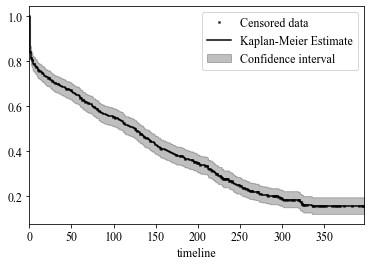

In [123]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
#
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':12})

kmf = KaplanMeierFitter()
T = df_u90["max_min"]
E = df_u90["observed"] # 0: unobserved, right censored; 1: observed, churn.
kmf.fit(T, event_observed=E)
kmf.plot(show_censors=True, censor_styles={'ms': 2, 'marker': 'x'}, color='k')
plt.legend(['Censored data', 'Kaplan-Meier Estimate', 'Confidence interval'])

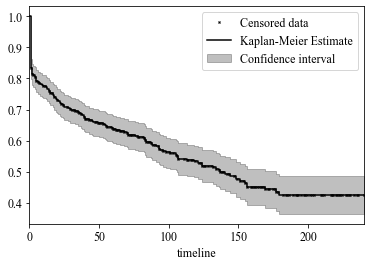

In [124]:
#df_u12
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':12})

kmf = KaplanMeierFitter()
T = df_u12["max_min"]
E = df_u12["observed"] # 0: unobserved, right censored; 1: observed, churn.
kmf.fit(T, event_observed=E)
kmf.plot(show_censors=True, censor_styles={'ms': 2, 'marker': 'x'}, color='k')
plt.legend(['Censored data', 'Kaplan-Meier Estimate', 'Confidence interval'])

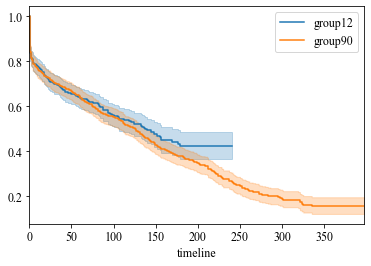

In [126]:
# 多分组
groups = df_sum['group']
ix = (groups == '90')
T = df_sum["max_min"]
E = df_sum["observed"]
kmf.fit(T[~ix], E[~ix], label='group12')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='group90')
ax = kmf.plot(ax=ax)

#### model

In [121]:
#df_sum = pd.read_csv('data//data0326.csv',encoding = 'utf-8')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines.datasets import load_waltons
from lifelines import *
from lifelines.utils import median_survival_times

In [298]:
df_sum['at_cnt'] = df_sum['at_cnt'].fillna(0)
df_sum['mean_talk']=df_sum['talk_cnt']/df_sum['act_days']

In [304]:
df_sum.corr()['max_min']

talk_cnt     0.212353
max_min      1.000000
observed    -0.222992
act_days     0.554601
at_cnt       0.162706
if_at        0.320752
mean_talk   -0.000057
Name: max_min, dtype: float64

In [323]:
# MinMax数据标准化
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_sum['0-1at_cnt']=scaler.fit_transform(df_sum['at_cnt'].values.reshape(-1,1))
df_sum['0-1if_at']=scaler.fit_transform(df_sum['if_at'].values.reshape(-1,1))

In [324]:
# Z-score标准化
from sklearn.preprocessing import scale
df_sum['Zat_cnt']=scale(df_sum['at_cnt'].values.reshape(-1,1))
df_sum['Zif_at']=scale(df_sum['if_at'].values.reshape(-1,1))

In [325]:
## normalizer 归一化
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
df_sum['nor_at_cnt']=scaler.fit_transform(df_sum['at_cnt'].values.reshape(1,-1))[0]
df_sum['nor_if_at']=scaler.fit_transform(df_sum['if_at'].values.reshape(1,-1))[0]

In [332]:
#['mean_talk','max_min','observed','at_cnt','group','talk_cnt','act_days']
# '0-1at_cnt','Zat_cnt','nor_at_cnt'
# '0-1if_at','Zif_at','nor_if_at'
df_ = df_sum[['max_min','observed','0-1at_cnt','0-1if_at','group','talk_cnt','act_days']]
df_ = df_[df_.talk_cnt>1]
cph = CoxPHFitter()
cph.fit(df_, duration_col='max_min', event_col='observed',cluster_col='group') #strata=['mean_talk']
cph.print_summary()  # access the results using cph.summary

In [333]:
#['mean_talk','max_min','observed','at_cnt','group','talk_cnt','act_days']
# '0-1at_cnt','Zat_cnt','nor_at_cnt'
# '0-1if_at','Zif_at','nor_if_at'
df_ = df_sum[['max_min','observed','Zat_cnt','Zif_at','group','talk_cnt','act_days']]
df_ = df_[df_.talk_cnt>1]
cph = CoxPHFitter()
cph.fit(df_, duration_col='max_min', event_col='observed',cluster_col='group') #strata=['mean_talk']
cph.print_summary()  # access the results using cph.summary

In [340]:
#['mean_talk','max_min','observed','at_cnt','group','talk_cnt','act_days']
# '0-1at_cnt','Zat_cnt','nor_at_cnt'
# '0-1if_at','Zif_at','nor_if_at'
df_ = df_sum[['max_min','observed','Zat_cnt','Zif_at','group','mean_talk','act_days']]
df_ = df_[df_.max_min>1]
cph = CoxPHFitter()
cph.fit(df_, duration_col='max_min', event_col='observed',cluster_col='group') #strata=['mean_talk']
cph.print_summary()  # access the results using cph.summary

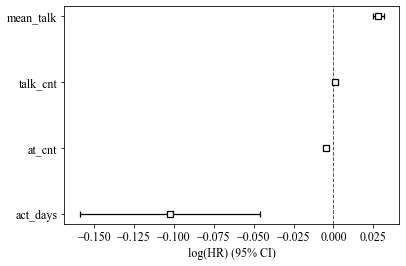

In [165]:
cph.plot()

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.





1. Variable 'mean_talk' failed the non-proportional test: p-value is 0.0338.

   Advice 1: the functional form of the variable 'mean_talk' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'mean_talk' using pd.cut, and then specify it in
`strata=['mean_talk', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'at_cnt' failed the non-proportional test: p-value is 0.0152.

   Advice 1: the functional form of the variable 'at_cnt' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional

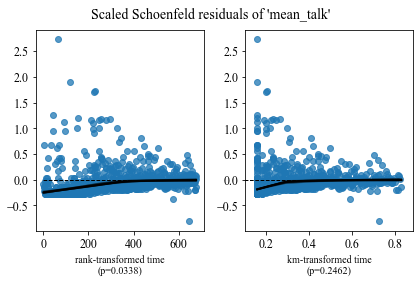

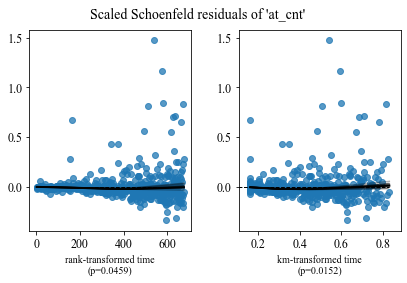

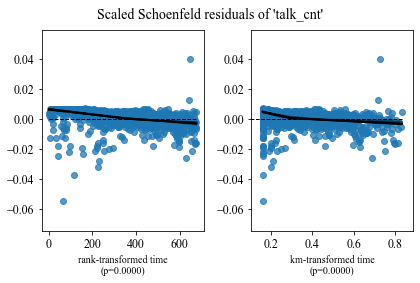

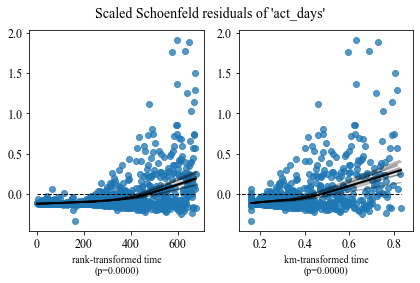

In [166]:
cph.check_assumptions(df_, p_value_threshold=0.05, show_plots=True)

In [175]:
df_[df_.talk_cnt ==5].count()

mean_talk    32
max_min      32
observed     32
at_cnt       32
group        32
talk_cnt     32
act_days     32
dtype: int64

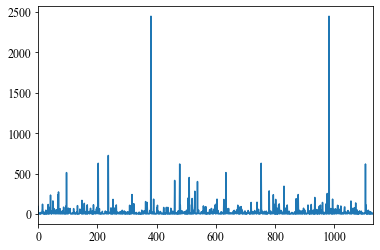

In [214]:
df_sum.if_at.plot()

### 文本抽样

In [683]:
import pandas as pd
#df = pd.read_csv('data//child2&3.csv',encoding = 'utf-8')
df_sample = pd.read_csv('data//wechat_sample_0325.csv',encoding = 'utf-8')

In [396]:
df=df[df.mType==1]
df= df.reset_index(drop=True)

In [399]:
df_msgId = pd.DataFrame()
df_msgId['msgId'] = df_sample['msgId']
df_msgId['sa'] = 1

In [405]:
dff = pd.merge(df,df_msgId,on = 'msgId',how='left')

In [406]:
dff['sa'] = dff['sa'].fillna(0)

In [408]:
dff[dff.sa==1].count()

msgId         5799
chatroom      5799
mType         5799
createTime    5799
content       5799
flow_tag      5799
talker_id     5799
if_sample     5799
sa            5799
dtype: int64

In [410]:
df1 = dff[dff.chatroom=='5007452012@chatroom'][dff.sa==0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [411]:
df2 = dff[dff.chatroom=='5556417190@chatroom'][dff.sa==0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [412]:
import numpy as np
np.random.seed(seed=2)

In [413]:
df11 = df1.sample(frac=0.05)

In [427]:
df11.msgId.count()

2944

In [415]:
df12 = df2.sample(frac=0.05)

In [428]:
df12.msgId.count()

2565

In [417]:
df11.createTime.min(),df11.createTime.max()

('2018-07-17 16:21:22', '2019-03-14 09:00:39')

In [418]:
df12.createTime.min(),df12.createTime.max()

('2018-01-31 15:00:20', '2019-03-13 21:32:13')

In [419]:
df_test = pd.concat([df11,df12])

In [429]:
df_test.msgId.count()

5509

In [424]:
df_test.drop(['if_sample','sa'],axis = 1,inplace=True)

In [425]:
df_test.head()

,msgId,chatroom,mType,createTime,content,flow_tag,talker_id
22230,144026,5007452012@chatroom,1,2019-02-20 10:21:08,良性的化疗不敏感,0,wxid_0evappusl0622
12661,100493,5007452012@chatroom,1,2018-11-30 10:59:21,@喜来?批发价多少钱,2,wxid_psmmfcuyrvie21
31678,177438,5007452012@chatroom,1,2018-11-17 23:18:30,@知足常乐?大脑左右，右为主弥散型胶质瘤,0,wxid_tyeiucvzb46322
86613,393731,5007452012@chatroom,1,2019-01-05 16:23:27,我当时挺坚强的，爱人吓得在手术室外面做了七个小时不敢站起来,0,wxid_g31fxtu30e7z21
49877,246996,5007452012@chatroom,1,2019-02-19 17:31:04,感觉没那么高，说很累，让先试两天，害怕受不了[捂脸][捂脸][捂脸],0,wxid_44prp7uixrse12


In [426]:
df_test.to_csv('data//wechat_sample_2.csv',encoding = 'utf-8-sig',index = None)

### 文本处理

In [545]:
info = pd.read_csv('data//info.csv',encoding = 'utf-8')

In [546]:
info.head()

,id,name,null
0,aiqike,NaN,NaN
1,wxid_5hdftmx7hdyn12,NaN,NaN
2,10690173821@chatroom,递爱之家颅内卵黄囊瘤胚胎癌绒癌群,NaN
3,11038223914@chatroom,电场optune群,NaN
4,12061178839@chatroom,递爱之家髓母1群,NaN


In [555]:
l1 = list()
l2 = list()
for i in range(0,len(df)):
    if "@" in df['content'][i]:
        l1.append(1)
        #l2.append(df['content'][i])
    else:
        l1.append(0)
l1[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [557]:
df['if_at']= pd.DataFrame(l1)

In [571]:
df_C = pd.DataFrame()
df_C = df[df.if_at == 1][['msgId','chatroom','talker_id','content']]

In [572]:
df_C.head()

,msgId,chatroom,talker_id,content
6,49770,5007452012@chatroom,sujie9988,@病友之家大白?这么说来日本髓母下来也差不多了
13,49788,5007452012@chatroom,sujie9988,@糖果?孩子还好吧
16,49791,5007452012@chatroom,sujie9988,@糖果?没意识？
18,49793,5007452012@chatroom,limuhao001,@豫 髓母4岁术后 待放化?我们做父母的只能竭尽所能给孩子医治，尽人事听天命
19,49794,5007452012@chatroom,sujie9988,@济南10岁髓母?只能这样了，再难过再害怕也只有面对，有时候结果也许不是最坏的


In [562]:
import re
pat = re.compile("(\@).*(\?)")

'@病友之家大白?'

In [573]:
df_C = df_C.reset_index(drop=True)

In [577]:
quote_list=list()
new_content_list=list()
for current_content in df_C.content:
    ans = pat.search(current_content)
    new_content = current_content
    if ans:
        quote = ans.group()
        quote_list.append(quote)
        new_content = current_content.replace(quote, "")
        
    else:
        quote_list.append(0)
    new_content_list.append(new_content)
# quote_list[:10]
new_content_list[:10]

['这么说来日本髓母下来也差不多了',
 '孩子还好吧',
 '没意识？',
 '我们做父母的只能竭尽所能给孩子医治，尽人事听天命\ue41d',
 '只能这样了，再难过再害怕也只有面对，有时候结果也许不是最坏的',
 '怎么会这样呢？孩子几岁了，手术前怎么样？',
 '还没手术呢？',
 '既然在这里做了，这时候就相信医生吧。',
 '哎！真是选错医院误了孩子！',
 '  是不是术后有脑积水，压的']

In [578]:
df_C['at_c'] = pd.DataFrame(quote_list)
df_C['content_without_quote'] = pd.DataFrame(new_content_list)
df_C.head()

,msgId,chatroom,talker_id,content,at_c,content_without_quote
0,49770,5007452012@chatroom,sujie9988,@病友之家大白?这么说来日本髓母下来也差不多了,@病友之家大白?,这么说来日本髓母下来也差不多了
1,49788,5007452012@chatroom,sujie9988,@糖果?孩子还好吧,@糖果?,孩子还好吧
2,49791,5007452012@chatroom,sujie9988,@糖果?没意识？,@糖果?,没意识？
3,49793,5007452012@chatroom,limuhao001,@豫 髓母4岁术后 待放化?我们做父母的只能竭尽所能给孩子医治，尽人事听天命,@豫 髓母4岁术后 待放化?,我们做父母的只能竭尽所能给孩子医治，尽人事听天命
4,49794,5007452012@chatroom,sujie9988,@济南10岁髓母?只能这样了，再难过再害怕也只有面对，有时候结果也许不是最坏的,@济南10岁髓母?,只能这样了，再难过再害怕也只有面对，有时候结果也许不是最坏的


In [581]:
df_CC = pd.read_csv('data//at_process.csv',encoding = 'utf-8')

In [582]:
df_CC.head()

,msgId,chatroom,talker_id,content_without
0,51844,5556417190@chatroom,wxid_ktr4cbwcdh2222,有谁知道孩子化疗影起的肺部重度感染的。在哪家医院能治疗的。急盼各位回复谢谢。
1,51849,5556417190@chatroom,wxid_psmmfcuyrvie21,NaN
2,56870,5556417190@chatroom,wxid_hwg6xtytli7l22,电场治疗是继手术放化疗免疫领域之后的第五大治疗方式！请查阅，尤其是在胶质瘤领域效果更佳！最重...
3,72868,5556417190@chatroom,wxid_nhealqnx9z0g22,大家好，前两天哪位病友预约的世纪坛核磁不做的？谢谢大家
4,74591,5556417190@chatroom,wxid_scdc598digo422,病友们大家好。有需要蒂清的吗？低价转让，有需要的加微信私聊。


In [584]:
df_pro = df

In [605]:
df_CC['label'] = 1

In [612]:
df_CC.drop(['chatroom','talker_id'],axis = 1,inplace = True)
df_CC.head()

,msgId,content_without,label
0,51844,有谁知道孩子化疗影起的肺部重度感染的。在哪家医院能治疗的。急盼各位回复谢谢。,1
1,51849,NaN,1
2,56870,电场治疗是继手术放化疗免疫领域之后的第五大治疗方式！请查阅，尤其是在胶质瘤领域效果更佳！最重...,1
3,72868,大家好，前两天哪位病友预约的世纪坛核磁不做的？谢谢大家,1
4,74591,病友们大家好。有需要蒂清的吗？低价转让，有需要的加微信私聊。,1


In [614]:
df_pro = pd.merge(df_pro,df_CC,on = 'msgId',how='left')

In [617]:
df_pro['label'] = df_pro['label'].fillna(0)

In [618]:
df_pro.head()

,msgId,chatroom,mType,createTime,content,flow_tag,talker_id,date,if_at,content_without,label
0,49760,5007452012@chatroom,1,2018-08-24 11:22:58,不能比价格,2,wxid_psmmfcuyrvie21,2018-08-24,0,NaN,0.0
1,49761,5007452012@chatroom,1,2018-08-24 11:23:05,是,2,sujie9988,2018-08-24,0,NaN,0.0
2,49762,5007452012@chatroom,1,2018-08-24 11:23:10,髓母多了一个脊髓放疗,2,wxid_psmmfcuyrvie21,2018-08-24,0,NaN,0.0
3,49763,5007452012@chatroom,1,2018-08-24 11:23:12,可以去德国,2,wxid_nr9f78yoe69421,2018-08-24,0,NaN,0.0
4,49764,5007452012@chatroom,1,2018-08-24 11:23:27,钱都交了，安心治疗吧，现在长庚医院也要求治疗前费用交齐了,2,limuhao001,2018-08-24,0,NaN,0.0


In [ ]:
# #合并处理@前后的数据
# new_content = list()
# for i in range(0,len(df_pro)):
#     if df_pro['label'][i]==0:
#         new_content.append(df_pro['content'][i])
#     else:
#         new_content.append(df_pro['content_without'][i])       
#     if i%10000==0:
#         print(i)

In [622]:
df_pro['new_content'] = pd.DataFrame(new_content)

In [624]:
df_pro.drop(['content_without'],axis = 1,inplace = True)

In [634]:
new_content = list()
for i in range(0,len(df_pro)):
    new_content.append(str(df_pro['new_content'][i]).replace(" ", ""))
df_pro['new_content_1']= pd.DataFrame(new_content)
df_pro.drop(['new_content'],axis = 1,inplace = True)

In [635]:
df_pro['length'] = df_pro['new_content_1'].apply(lambda x:len(x))

In [661]:
df_pro[df_pro.mType==1][df_pro.length>2].length.describe()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    107432.000000
mean         14.374367
std          31.293407
min           3.000000
25%           6.000000
50%          10.000000
75%          16.000000
max        3353.000000
Name: length, dtype: float64

In [687]:
df_sample['sa'] = 1
df_pro = pd.merge(df_pro,df_sample[['msgId','sa']],on = 'msgId',how='left')
df_pro['sa']=df_pro['sa'].fillna(0)
df_pro.head()

,msgId,chatroom,mType,createTime,content,flow_tag,talker_id,date,if_at,label,new_content_1,length,sa
0,49760,5007452012@chatroom,1,2018-08-24 11:22:58,不能比价格,2,wxid_psmmfcuyrvie21,2018-08-24,0,0.0,不能比价格,5,0.0
1,49761,5007452012@chatroom,1,2018-08-24 11:23:05,是,2,sujie9988,2018-08-24,0,0.0,是,1,0.0
2,49762,5007452012@chatroom,1,2018-08-24 11:23:10,髓母多了一个脊髓放疗,2,wxid_psmmfcuyrvie21,2018-08-24,0,0.0,髓母多了一个脊髓放疗,10,1.0
3,49763,5007452012@chatroom,1,2018-08-24 11:23:12,可以去德国,2,wxid_nr9f78yoe69421,2018-08-24,0,0.0,可以去德国,5,0.0
4,49764,5007452012@chatroom,1,2018-08-24 11:23:27,钱都交了，安心治疗吧，现在长庚医院也要求治疗前费用交齐了,2,limuhao001,2018-08-24,0,0.0,钱都交了，安心治疗吧，现在长庚医院也要求治疗前费用交齐了,28,0.0


In [688]:
df_pro1 = df_pro[df_pro.mType==1][df_pro.length>2]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [689]:
df_pro1.to_csv('data//all_wechat_pro.csv',encoding = 'utf-8-sig',index = None)

In [690]:
df_s1 = df_pro1[df_pro1.chatroom=='5007452012@chatroom'][df_pro1.sa==0]
df_s2 = df_pro1[df_pro1.chatroom=='5556417190@chatroom'][df_pro1.sa==0]
np.random.seed(seed=10)
df_s11 = df_s1.sample(frac=0.05)
df_s22 = df_s2.sample(frac=0.05)
df_sample1 = pd.concat([df_s11,df_s22])
df_sample1.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,msgId,chatroom,mType,createTime,content,flow_tag,talker_id,date,if_at,label,new_content_1,length,sa
7470,77188,5007452012@chatroom,1,2019-03-05 22:49:23,写给谁了,2,wxid_cezpu2hxcb4k22,2019-03-05,0,0.0,写给谁了,4,0.0
110588,464878,5007452012@chatroom,1,2018-11-17 09:03:03,[捂脸][捂脸][捂脸],0,pengjuan505711,2018-11-17,0,0.0,[捂脸][捂脸][捂脸],12,0.0
24196,145838,5007452012@chatroom,1,2018-12-15 13:45:20,你周一挂李春德的号他给开的单子就是特需核磁,0,wxid_uqa61jk12neu41,2018-12-15,0,0.0,你周一挂李春德的号他给开的单子就是特需核磁,21,0.0
116329,489258,5007452012@chatroom,1,2018-11-20 19:20:50,第一个好呀，医生精力是最棒的,0,wxid_g31fxtu30e7z21,2018-11-20,0,0.0,第一个好呀，医生精力是最棒的,14,0.0
95584,409540,5007452012@chatroom,1,2018-11-30 20:01:40,你有核磁片么,0,zhaoxilai003,2018-11-30,0,0.0,你有核磁片么,6,0.0


In [682]:
#df_sample1.count()

In [691]:
df_saindex = df_pro1[df_pro1.sa==1][['msgId','new_content_1']]

In [692]:
df_saindex['label'] = 1
df_sample = pd.merge(df_sample,df_saindex,on = 'msgId',how='left')
df_sample['label']=df_sample['label'].fillna(0)
df_sample.head()

,msgId,chatroom,mType,createTime,content,flow_tag,talker_id,seek_info,offer_info,seek_love,offer_love,company,sa,new_content_1,label
0,166208,5007452012@chatroom,1,2019/3/5 21:47,1,0,iakgnaw,NaN,1.0,NaN,NaN,NaN,1,NaN,0.0
1,362883,5007452012@chatroom,1,2019/1/4 22:34,3,0,huclapp,NaN,1.0,NaN,NaN,NaN,1,NaN,0.0
2,490448,5556417190@chatroom,1,2018/3/24 21:36,6,0,wxid_psmmfcuyrvie21,NaN,1.0,NaN,NaN,NaN,1,NaN,0.0
3,299608,5007452012@chatroom,1,2018/12/31 22:13,110,0,wxid_xp8lrx2tp3cf21,NaN,NaN,NaN,NaN,1.0,1,110,1.0
4,273745,5556417190@chatroom,1,2018/6/29 23:00,580,0,wxid_7lsbjt1egn1j22,NaN,1.0,NaN,NaN,NaN,1,580,1.0


In [695]:
df_sample.to_csv('data//wechat_sample_0405.csv',encoding = 'utf-8-sig',index = None)

In [685]:
#df_pro.drop(['sa'],axis=1,inplace = True)

In [696]:
df_sample1.to_csv('data//wechat_sample2_0405.csv',encoding = 'utf-8-sig',index = None)